<a href="https://colab.research.google.com/github/kidd89/Natural-Language-Processing/blob/main/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imdb movie dataset- to findout whether its postive or negative review

##Sentiment Analysis of IMDB Reviews

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/IMDB Dataset.csv")
df.head()
#df.shape

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# frequency review count
vc_df = pd.DataFrame(df['sentiment'].value_counts ()).reset_index()
vc_df.columns = ['sentiment','count']
vc_df['sentiment'] = vc_df['sentiment'].map({1:'postive',0:'negative'})
vc_df

,sentiment,count
0,NaN,25000
1,NaN,25000


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


##Pre-processing data

##some common problems
1.Remove punctuation
2.replace the short words
3.making text lower case
4.remove stop-words
5.lemmatization

##Removing punctuation(%!&*@{}-[])

In [ ]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
#replacing punctuations with space
df['review_processed'] = df['review'].str.replace("[^a-zA-Z0-9]"," ") # its not symbol ^

# Re-ordering the columns
df = df[['review','review_processed','sentiment']]

<ipython-input-5-722ef34ab124>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_processed'] = df['review'].str.replace("[^a-zA-Z0-9]"," ") # its not symbol ^


In [ ]:
df.head()

,review,review_processed,sentiment
0,One of the other reviewers has mentioned that ...,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,A wonderful little production br br The...,positive
2,I thought this was a wonderful way to spend ti...,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,Basically there s a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",Petter Mattei s Love in the Time of Money is...,positive


In [ ]:
df['review_processed']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production   br    br   The...
2        I thought this was a wonderful way to spend ti...
3        Basically there s a family where a little boy ...
4        Petter Mattei s  Love in the Time of Money  is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot  bad dialogue  bad acting  idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I m going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review_processed, Length: 50000, dtype: object

#Replacing the short words

In [ ]:
#join command
' '.join(['this','batch','is','awesome'])

'this batch is awesome'

In [ ]:
df['review_processed'] = df['review_processed'].apply(lambda row:' '.join([word for word in row.split() if len(word)>2]))
         #deleting the two letter in a word at the sentence, example: is,a,to,on...etc

In [ ]:
df['review_processed']

0        One the other reviewers has mentioned that aft...
1        wonderful little production The filming techni...
2        thought this was wonderful way spend time too ...
3        Basically there family where little boy Jake t...
4        Petter Mattei Love the Time Money visually stu...
                               ...                        
49995    thought this movie did down right good job was...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    Catholic taught parochial elementary schools n...
49998    going have disagree with the previous comment ...
49999    one expects the Star Trek movies high art but ...
Name: review_processed, Length: 50000, dtype: object

#Lowercase character

In [ ]:
"praveen" == "Praveen"

False

In [ ]:
word = "Praveen"
word.lower()

'praveen'

In [ ]:
#make entire text in lowercase
df["review_processed"] = [row.lower() for row in df["review_processed"]]

In [ ]:
df["review_processed"]

0        one the other reviewers has mentioned that aft...
1        wonderful little production the filming techni...
2        thought this was wonderful way spend time too ...
3        basically there family where little boy jake t...
4        petter mattei love the time money visually stu...
                               ...                        
49995    thought this movie did down right good job was...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going have disagree with the previous comment ...
49999    one expects the star trek movies high art but ...
Name: review_processed, Length: 50000, dtype: object

##removing stop-words

In [ ]:
#removing stop begin
import nltk
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk import word_tokenize

stopwords = stopwords.words('english')
stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#removing stop begin
import nltk
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')# extracting all the english language and storing it in variable called stop_words -> set

#making custom list of words to be removed
add_words = ['movie','film','make','one','even','see','movies','get','making','makes','time','watch','character','like','good','well','go','would','really']

#adding to the list of words
stop_words.extend(add_words)

#function to remove stop words

def remove_stopwords(rev):
  # INPUT : it will take row/review as an input
  # take the paragraph,break into words,check if the word is stopword,remove it if its stop word,combine the words into para again
  review_tokenized = word_tokenize(rev)
  rev_new = " ".join([i for i in review_tokenized if i  not in stop_words])
  return rev_new

#removing stopwords
df["review_processed"] = [remove_stopwords(r) for r in df["review_processed"]]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df["review_processed"]

0        reviewers mentioned watching episode hooked ri...
1        wonderful little production filming technique ...
2        thought wonderful way spend hot summer weekend...
3        basically family little boy jake thinks zombie...
4        petter mattei love money visually stunning mat...
                               ...                        
49995    thought right job creative original first expe...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin se...
49999    expects star trek high art fans expect best ep...
Name: review_processed, Length: 50000, dtype: object

#next thing is root-word extraction

##Lemmatization(word and part of the speech of the word)

In [ ]:
#begin lemmatization
nltk.download('wordnet') #its use for root-word
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tag import pos_tag

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

#find the part of speech tag
#convert the detailed part of speech tag into shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None

#lemmatizing sentence using parts of speech tag
#'sentence' as input we take nd its actually tokenize the entire sentence into set of words
  # word_tokenize-> parts of speech tag(detailed)->wordnet tag(shallow parts of speech)->lemmatizer - rootword
    #tokenize the sentence nd find the parts of speech('pos') tag for each token
def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))       # output will be list of tuples->[word,detailed_tag]
  #tuple of [token,wordnet_tag]
  wordnet_tagged = map(lambda x: (x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged) #output will be [word,shallow_tag],x is refers to nltk_tagged
  lemmatized_sentence = []
  for word,tag in wordnet_tagged:
    if tag is None:
      #if there is no available tag,then append the token as is
      lemmatized_sentence.append(word)
    else:
      #else use the tag to lemmatize the token
      lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return " ".join(lemmatized_sentence)


df["review_processed"] = df["review_processed"].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


1.split the sentence into two words
2.get the detailed parts of speech for eachword
3.get shallow part of speech from detailed parts of speeech, example just taking (verb,noun,adjecetive) not the past present future, or superlative or comparative degree something like that we didnt take
4.do lemmatizetion for each word
5.after that previous one,join all the words into sentence again

In [ ]:
df["review_processed"]

0        reviewer mention watch episode hook right exac...
1        wonderful little production film technique una...
2        think wonderful way spend hot summer weekend s...
3        basically family little boy jake think zombie ...
4        petter mattei love money visually stun mattei ...
                               ...                        
49995    think right job creative original first expect...
49996    bad plot bad dialogue bad act idiotic direct a...
49997    catholic teach parochial elementary school nun...
49998    go disagree previous comment side maltin secon...
49999    expect star trek high art fan expect best epis...
Name: review_processed, Length: 50000, dtype: object

##plotting frequent words

In [ ]:
df

,review,review_processed,sentiment
0,One of the other reviewers has mentioned that ...,reviewer mention watch episode hook right exac...,positive
1,A wonderful little production. <br /><br />The...,wonderful little production film technique una...,positive
2,I thought this was a wonderful way to spend ti...,think wonderful way spend hot summer weekend s...,positive
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love money visually stun mattei ...,positive
...,...,...,...
49995,I thought this movie did a down right good job...,think right job creative original first expect...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",bad plot bad dialogue bad act idiotic direct a...,negative
49997,I am a Catholic taught in parochial elementary...,catholic teach parochial elementary school nun...,negative
49998,I'm going to have to disagree with the previou...,go disagree previous comment side maltin secon...,negative


#exploratory data analiysis of text data

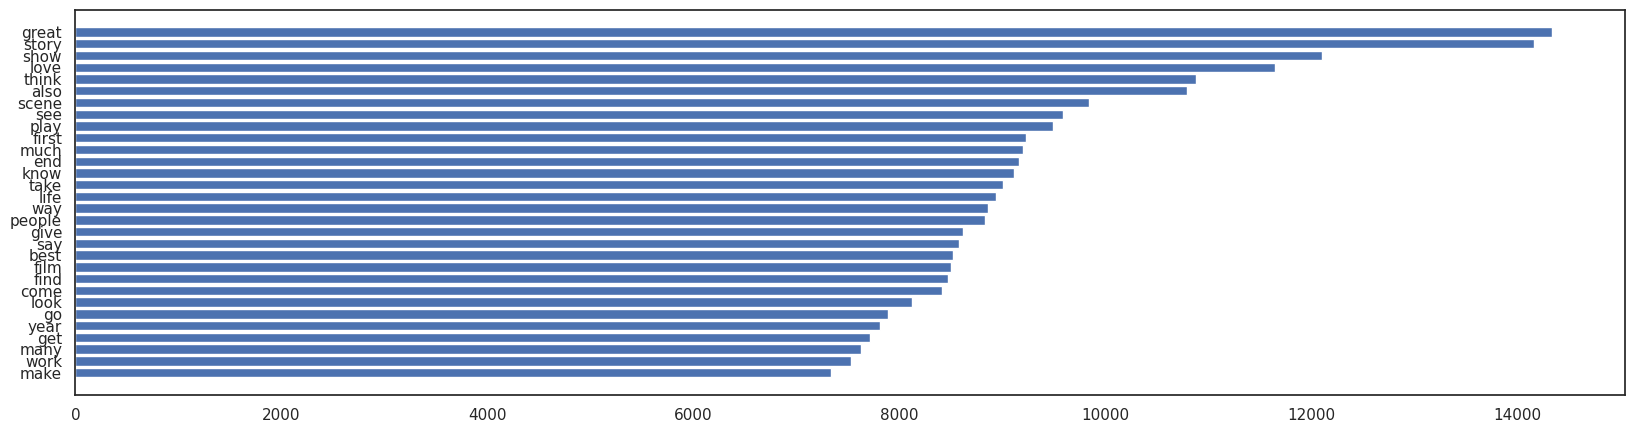

In [ ]:
# ploting most frequent words from postive reviews using bar chart

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #Function to find frequent words in data ,FreqDist=it will extract and plot,how many times each word present in dataset

#subset postive review dataset
all_words_df = df.loc[df['sentiment'] == 'positive',:]

#extract words into list and count frequency
all_words = ' '.join([text for text in all_words_df["review_processed"]])
all_words = all_words.split()
words_df = FreqDist(all_words)

#extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()),'count':list(words_df.values())})
words_df

#subset top 30 words by frequency
words_df = words_df.nlargest(columns ="count", n = 30)

words_df.sort_values('count', inplace=True)

# ploting 30 frequency words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'],width= words_df['count'])
plt.show()







from above barh chart we can say whether its clean is correct or not,and yes its correct

##another way to plot the data

#wordcloud

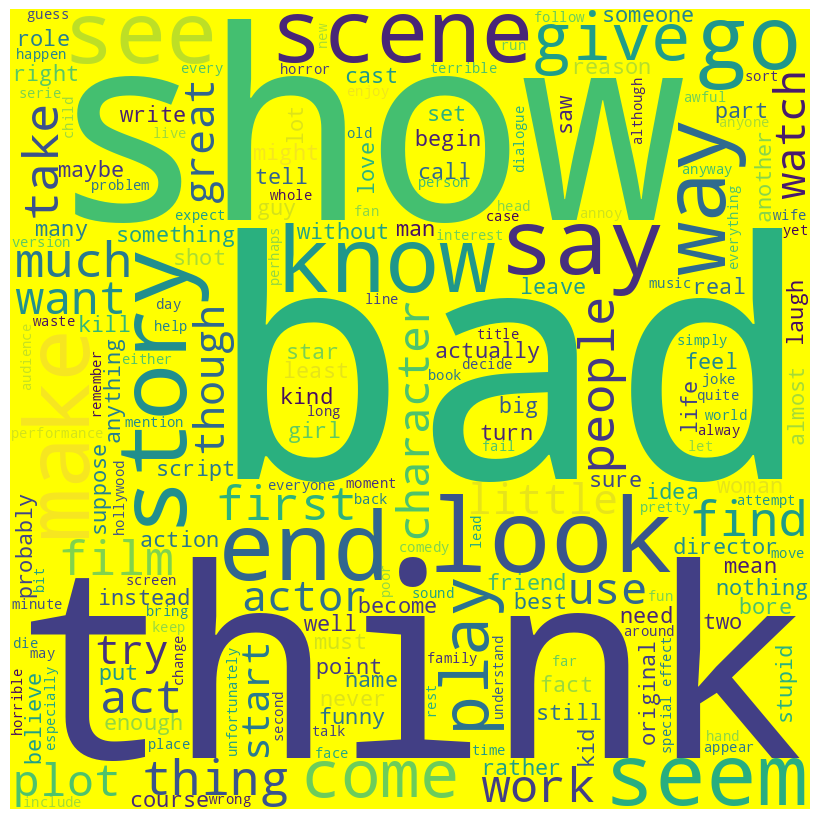

In [ ]:
## buliding a word cloud, it same as barhplot but it representing in a fancy way

from wordcloud import WordCloud
word_cloud_df = df.loc[df["sentiment"] == 'negative',:]
all_words = " ".join([text for text in word_cloud_df["review_processed"]])

#function for WordCloud
word_cloud = WordCloud(width=800,height=800,background_color='yellow',min_font_size=10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize= (8,8),facecolor= None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

from above wordcloud which ever the word getting bigger from the image,it means that word has more number of counts

#bag of Words Model

In [ ]:
#importing module

from sklearn.feature_extraction.text import TfidfVectorizer

#creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)

x = tfidf.fit_transform(df.review_processed).toarray()
y = df.sentiment.map({'positive':1,'negative':0}).values

featureNames = tfidf.get_feature_names_out()

x,y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([1, 1, 1, ..., 0, 0, 0]))

In [ ]:
#spliting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [ ]:
x_train.shape,x_test.shape

((40000, 2500), (10000, 2500))

In [ ]:
x_train

array([[0.        , 0.26632636, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

##Building ML Model

#Feature Importance

its a classfication problem so we apply decisiontree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
y_pred

#featureimportance = pd.DataFrame({i : j for i,j in zip (dt.featureimportance_,featureNames)},columns = ['Word','Importance'])

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("The model accuracy score is ",accuracy)

[[3604 1396]
 [1433 3567]]
The model accuracy score is  0.7171


<Axes: >

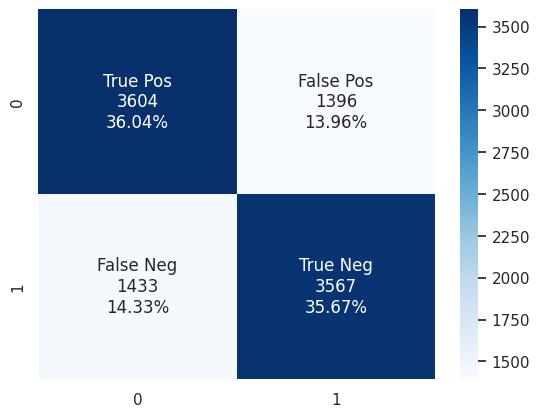

In [ ]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_precentages = ["{0:0.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_precentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="" , cmap='Blues')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,dt.predict_proba(x_test)[:,1])


0.7171000000000001

In [ ]:
#featureImportance.sort_values(by='Importance')
featureimportance =pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns= ['Importance','word'])
featureimportance.sort_values(by='Importance',ascending = False)

,Importance,word
95,0.130205,bad
1407,0.043570,waste
562,0.036698,great
90,0.021434,awful
442,0.015981,excellent
...,...,...
1268,0.000049,sweet
992,0.000033,product
751,0.000033,lonely
365,0.000025,doll


the word 'bad' is highest importance in this output  to predicting in this movie review dataset,so overall this is "BAD REVIEW has most "